In [2]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyqg_subgrid_experiments as pse

In [3]:
param = pse.ZB2020Parameterization()
dataset = pse.Dataset('../pyqg_subgrid_experiments/tests/fixtures/train.nc')

In [4]:
preds, sims, distances = param.test_on(dataset, n_simulations=1)

INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 4.16e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 3.96e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 5.17e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 6.99e-07, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 9.75e-07, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 1.40e-06, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 2.06e-06, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 3.09e-06, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 4.74e-06, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 7.39e-06, CFL: 0.006
INFO: Step: 11000, Time: 3.96e+07, KE: 1.17e-05, CFL: 0.006
INFO: Step: 12000, Time: 4.32e+07, KE: 1.88e-05, CFL: 0.006
INFO: Step: 13000, Time: 4.68e+07, KE: 3.06e-05, CFL: 0.008
INFO: Step: 14000, Time: 5.04e+07, KE: 5.04e-05, CFL: 0.011
INFO: Step: 15000, Time: 5.40e+07, KE: 8.36e-05, CFL: 0.014
INFO: Step: 16000, Time: 5.76e+07, KE: 1.40e-04, CFL: 0.018
INFO: Step: 17000, Time

In [35]:
import importlib
importlib.reload(pse.plot_helpers)
importlib.reload(pse)

<module 'pyqg_subgrid_experiments' from '/home/asr9645/pyqg_experiments/pyqg_subgrid_experiments/__init__.py'>

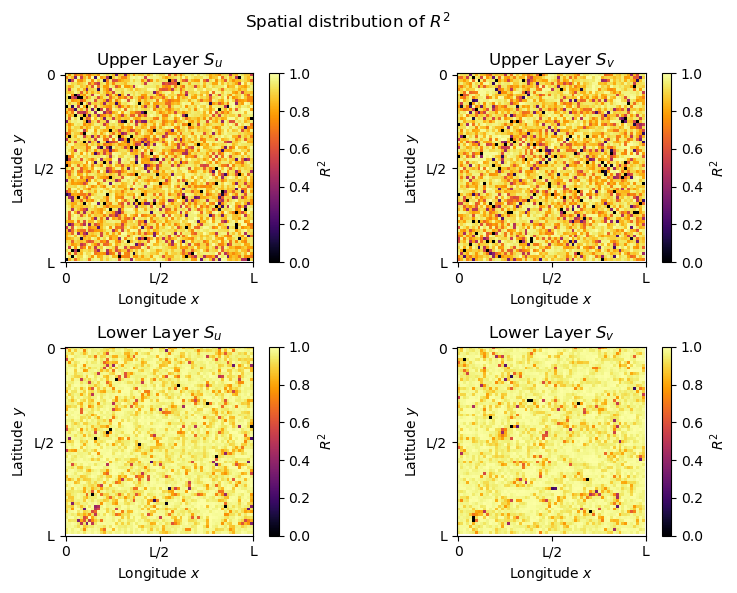

In [12]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Spatial distribution of $R^2$")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_spatial_skill"].isel(lev=z).data
            pse.imshow(arr, vmax=1, vmin=0, label="$R^2$")

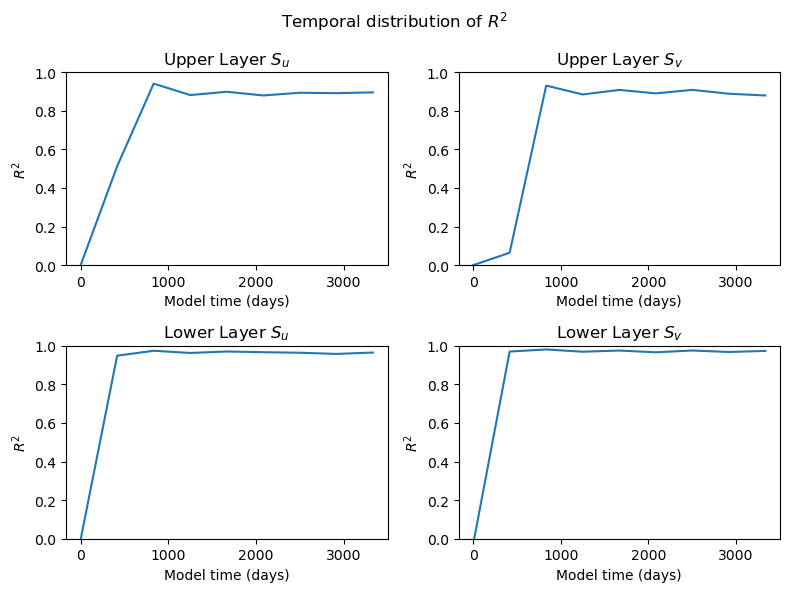

In [17]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Temporal distribution of $R^2$")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_temporal_skill"].isel(lev=z).data
            plt.plot(preds.time / np.timedelta64(1,'D'), arr)
            plt.xlabel("Model time (days)")
            plt.ylabel("$R^2$")
            plt.ylim(0,1)

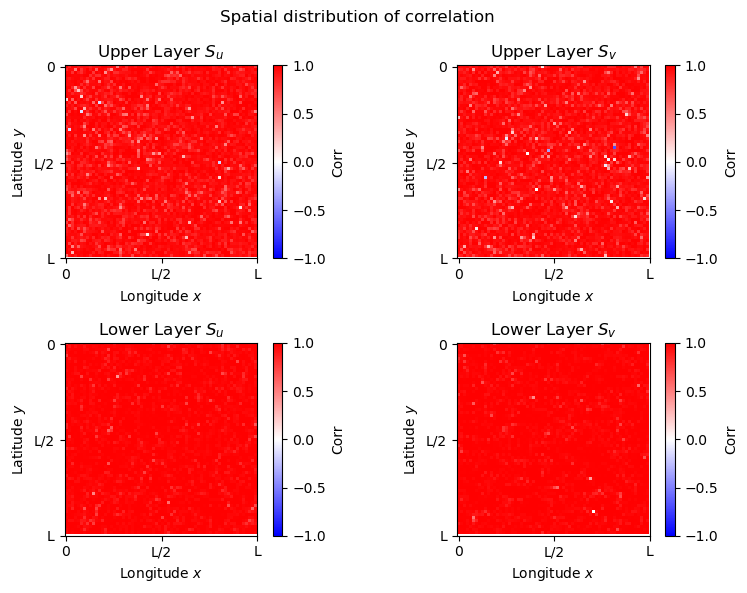

In [20]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Spatial distribution of correlation")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_spatial_correlation"].isel(lev=z).data
            pse.imshow(arr, vmin=-1, vmax=1, label='Corr')

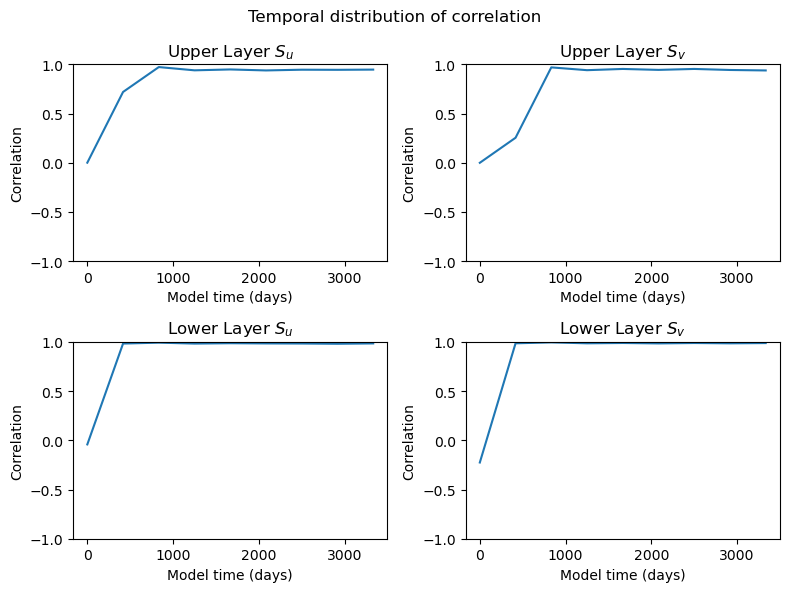

In [22]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Temporal distribution of correlation")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_temporal_correlation"].isel(lev=z).data
            plt.plot(preds.time / np.timedelta64(1,'D'), arr)
            plt.xlabel("Model time (days)")
            plt.ylabel("Correlation")
            plt.ylim(-1,1)

In [23]:
distances

defaultdict(dict,
            {'q1_wasserstein_distance': 4.6202198633412465e-07,
             'u1_wasserstein_distance': 0.0021350805454947164,
             'v1_wasserstein_distance': 0.0031083019902685693,
             'ke1_wasserstein_distance': 0.0002878508020377757,
             'en1_wasserstein_distance': 9.965833071893327e-13,
             'q2_wasserstein_distance': 1.1492862285664615e-07,
             'u2_wasserstein_distance': 0.0005194392415652782,
             'v2_wasserstein_distance': 0.0007627791913860094,
             'ke2_wasserstein_distance': 9.943060671133153e-06,
             'en2_wasserstein_distance': 2.0216327410608374e-14,
             'KEspec1_curve_rmse': 2.2692339587010364e-10,
             'KEspec1_slope_diff': -0.9360411420611654,
             'KEspec2_curve_rmse': 8.361575256895084e-12,
             'KEspec2_slope_diff': -0.751367800910602,
             'Ensspec1_curve_rmse': 3.3386007095647697e-18,
             'Ensspec1_slope_diff': -0.9468034128183689,


In [27]:
hires = pse.generate_dataset(nx=256).expand_dims('run')

INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 2.21e-07, CFL: 0.023
INFO: Step: 2000, Time: 7.20e+06, KE: 2.63e-07, CFL: 0.023
INFO: Step: 3000, Time: 1.08e+07, KE: 3.59e-07, CFL: 0.023
INFO: Step: 4000, Time: 1.44e+07, KE: 5.14e-07, CFL: 0.023
INFO: Step: 5000, Time: 1.80e+07, KE: 7.62e-07, CFL: 0.023
INFO: Step: 6000, Time: 2.16e+07, KE: 1.16e-06, CFL: 0.023
INFO: Step: 7000, Time: 2.52e+07, KE: 1.82e-06, CFL: 0.023
INFO: Step: 8000, Time: 2.88e+07, KE: 2.88e-06, CFL: 0.023
INFO: Step: 9000, Time: 3.24e+07, KE: 4.63e-06, CFL: 0.023
INFO: Step: 10000, Time: 3.60e+07, KE: 7.51e-06, CFL: 0.023
INFO: Step: 11000, Time: 3.96e+07, KE: 1.23e-05, CFL: 0.023
INFO: Step: 12000, Time: 4.32e+07, KE: 2.02e-05, CFL: 0.024
INFO: Step: 13000, Time: 4.68e+07, KE: 3.33e-05, CFL: 0.031
INFO: Step: 14000, Time: 5.04e+07, KE: 5.51e-05, CFL: 0.041
INFO: Step: 15000, Time: 5.40e+07, KE: 9.15e-05, CFL: 0.053
INFO: Step: 16000, Time: 5.76e+07, KE: 1.53e-04, CFL: 0.071
INFO: Step: 17000, Time

In [38]:
lores = pse.generate_dataset(nx=64).expand_dims('run')

INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 5.18e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 5.98e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 7.82e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 1.06e-06, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 1.48e-06, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 2.12e-06, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 3.11e-06, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 4.63e-06, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 7.00e-06, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 1.07e-05, CFL: 0.006
INFO: Step: 11000, Time: 3.96e+07, KE: 1.66e-05, CFL: 0.007
INFO: Step: 12000, Time: 4.32e+07, KE: 2.58e-05, CFL: 0.008
INFO: Step: 13000, Time: 4.68e+07, KE: 4.04e-05, CFL: 0.010
INFO: Step: 14000, Time: 5.04e+07, KE: 6.37e-05, CFL: 0.014
INFO: Step: 15000, Time: 5.40e+07, KE: 1.01e-04, CFL: 0.017
INFO: Step: 16000, Time: 5.76e+07, KE: 1.59e-04, CFL: 0.022
INFO: Step: 17000, Time

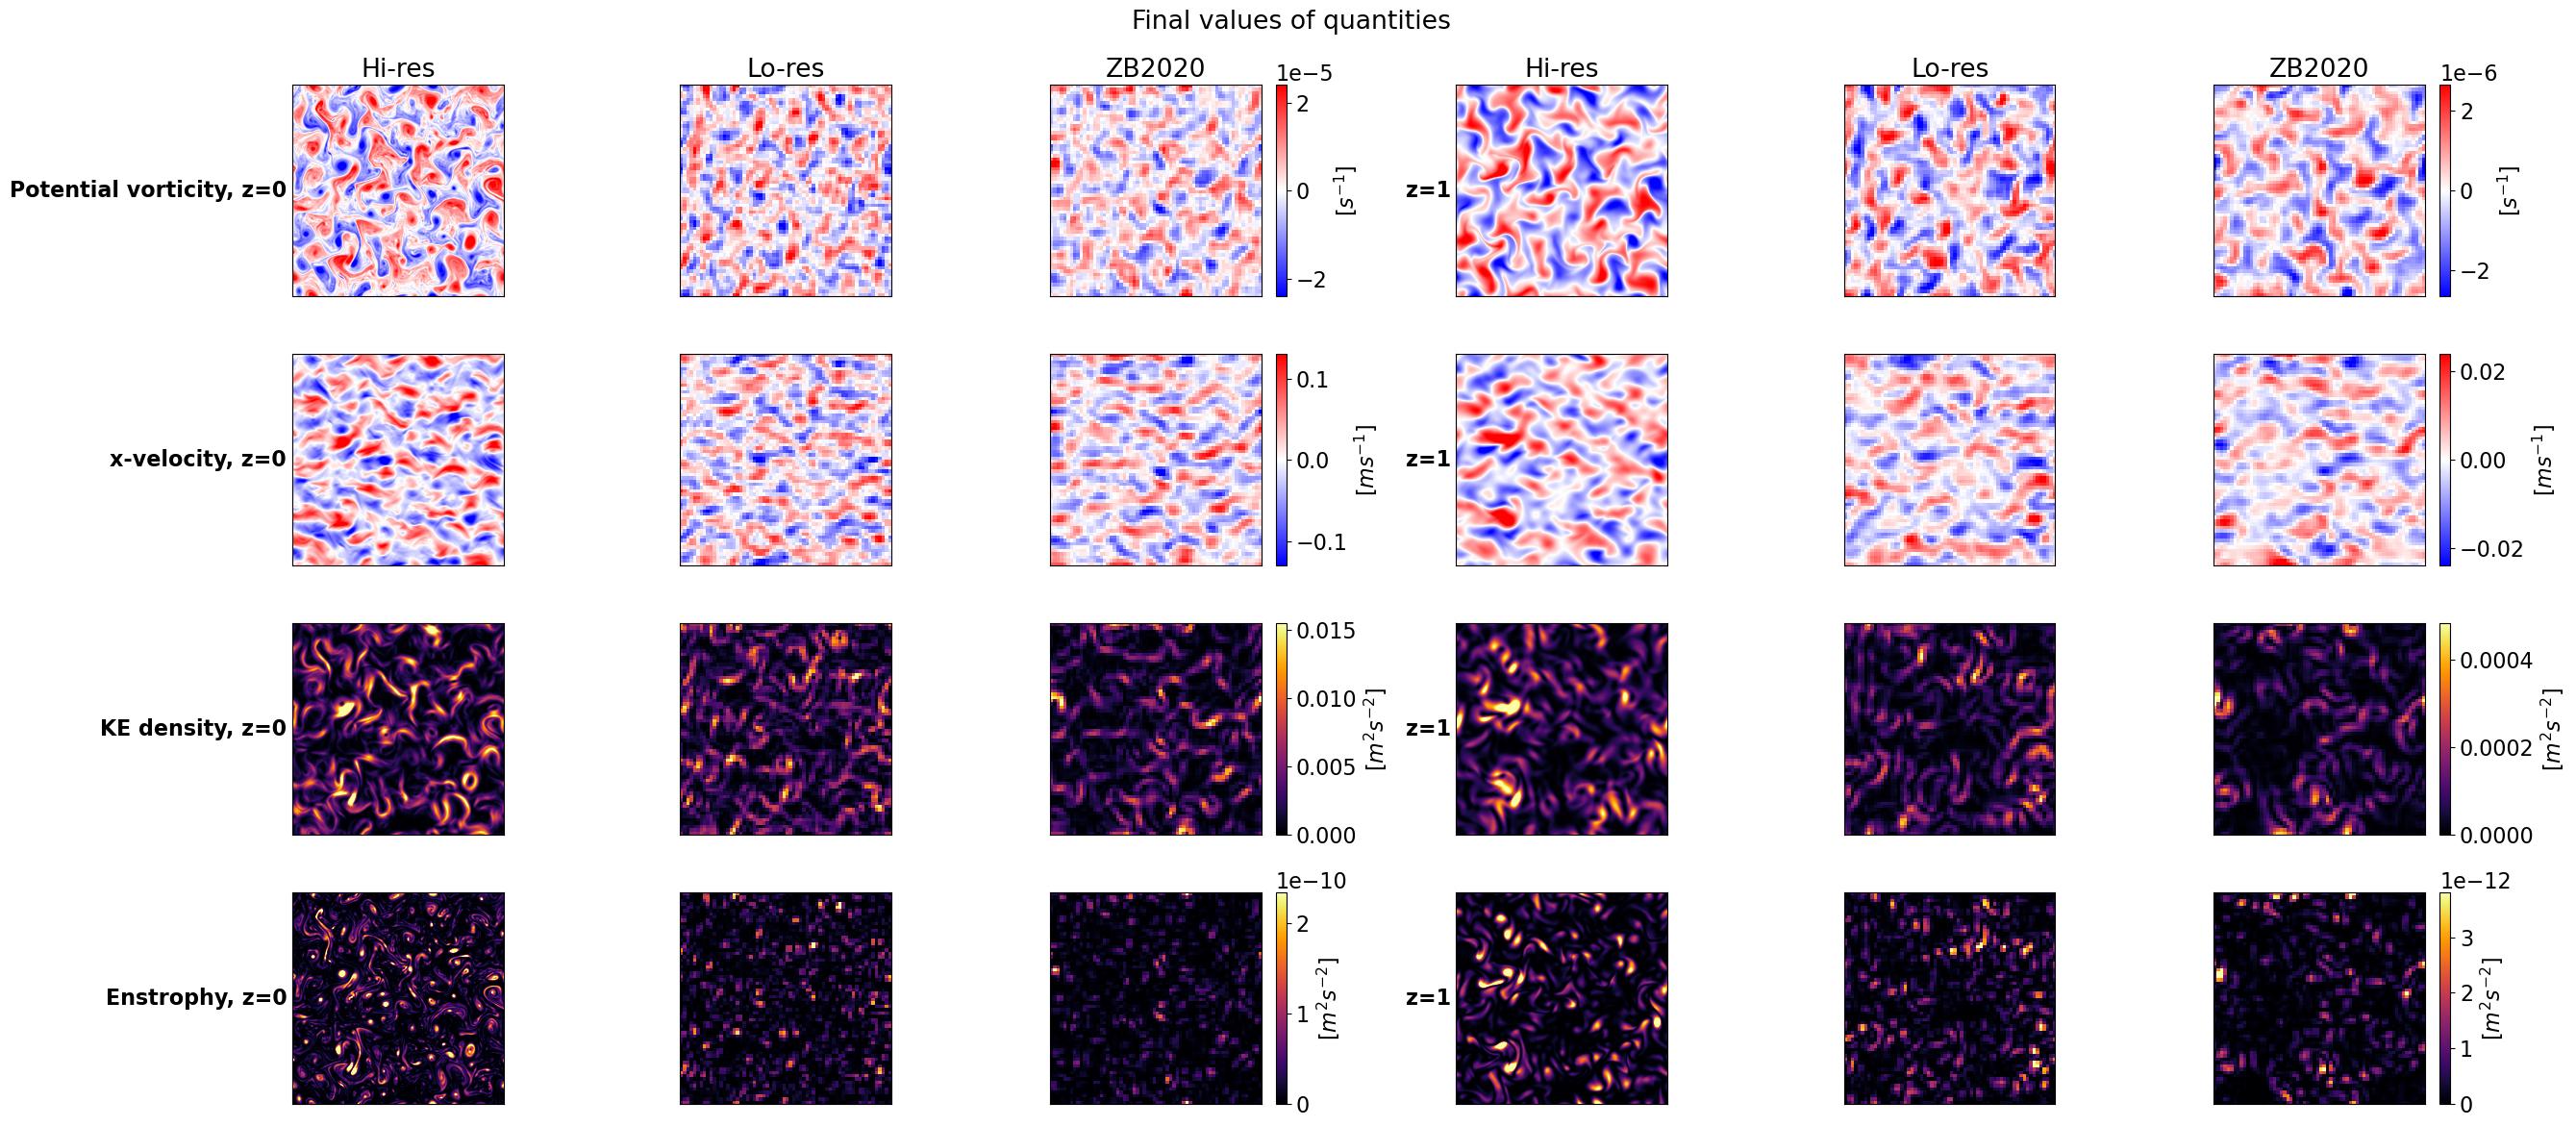

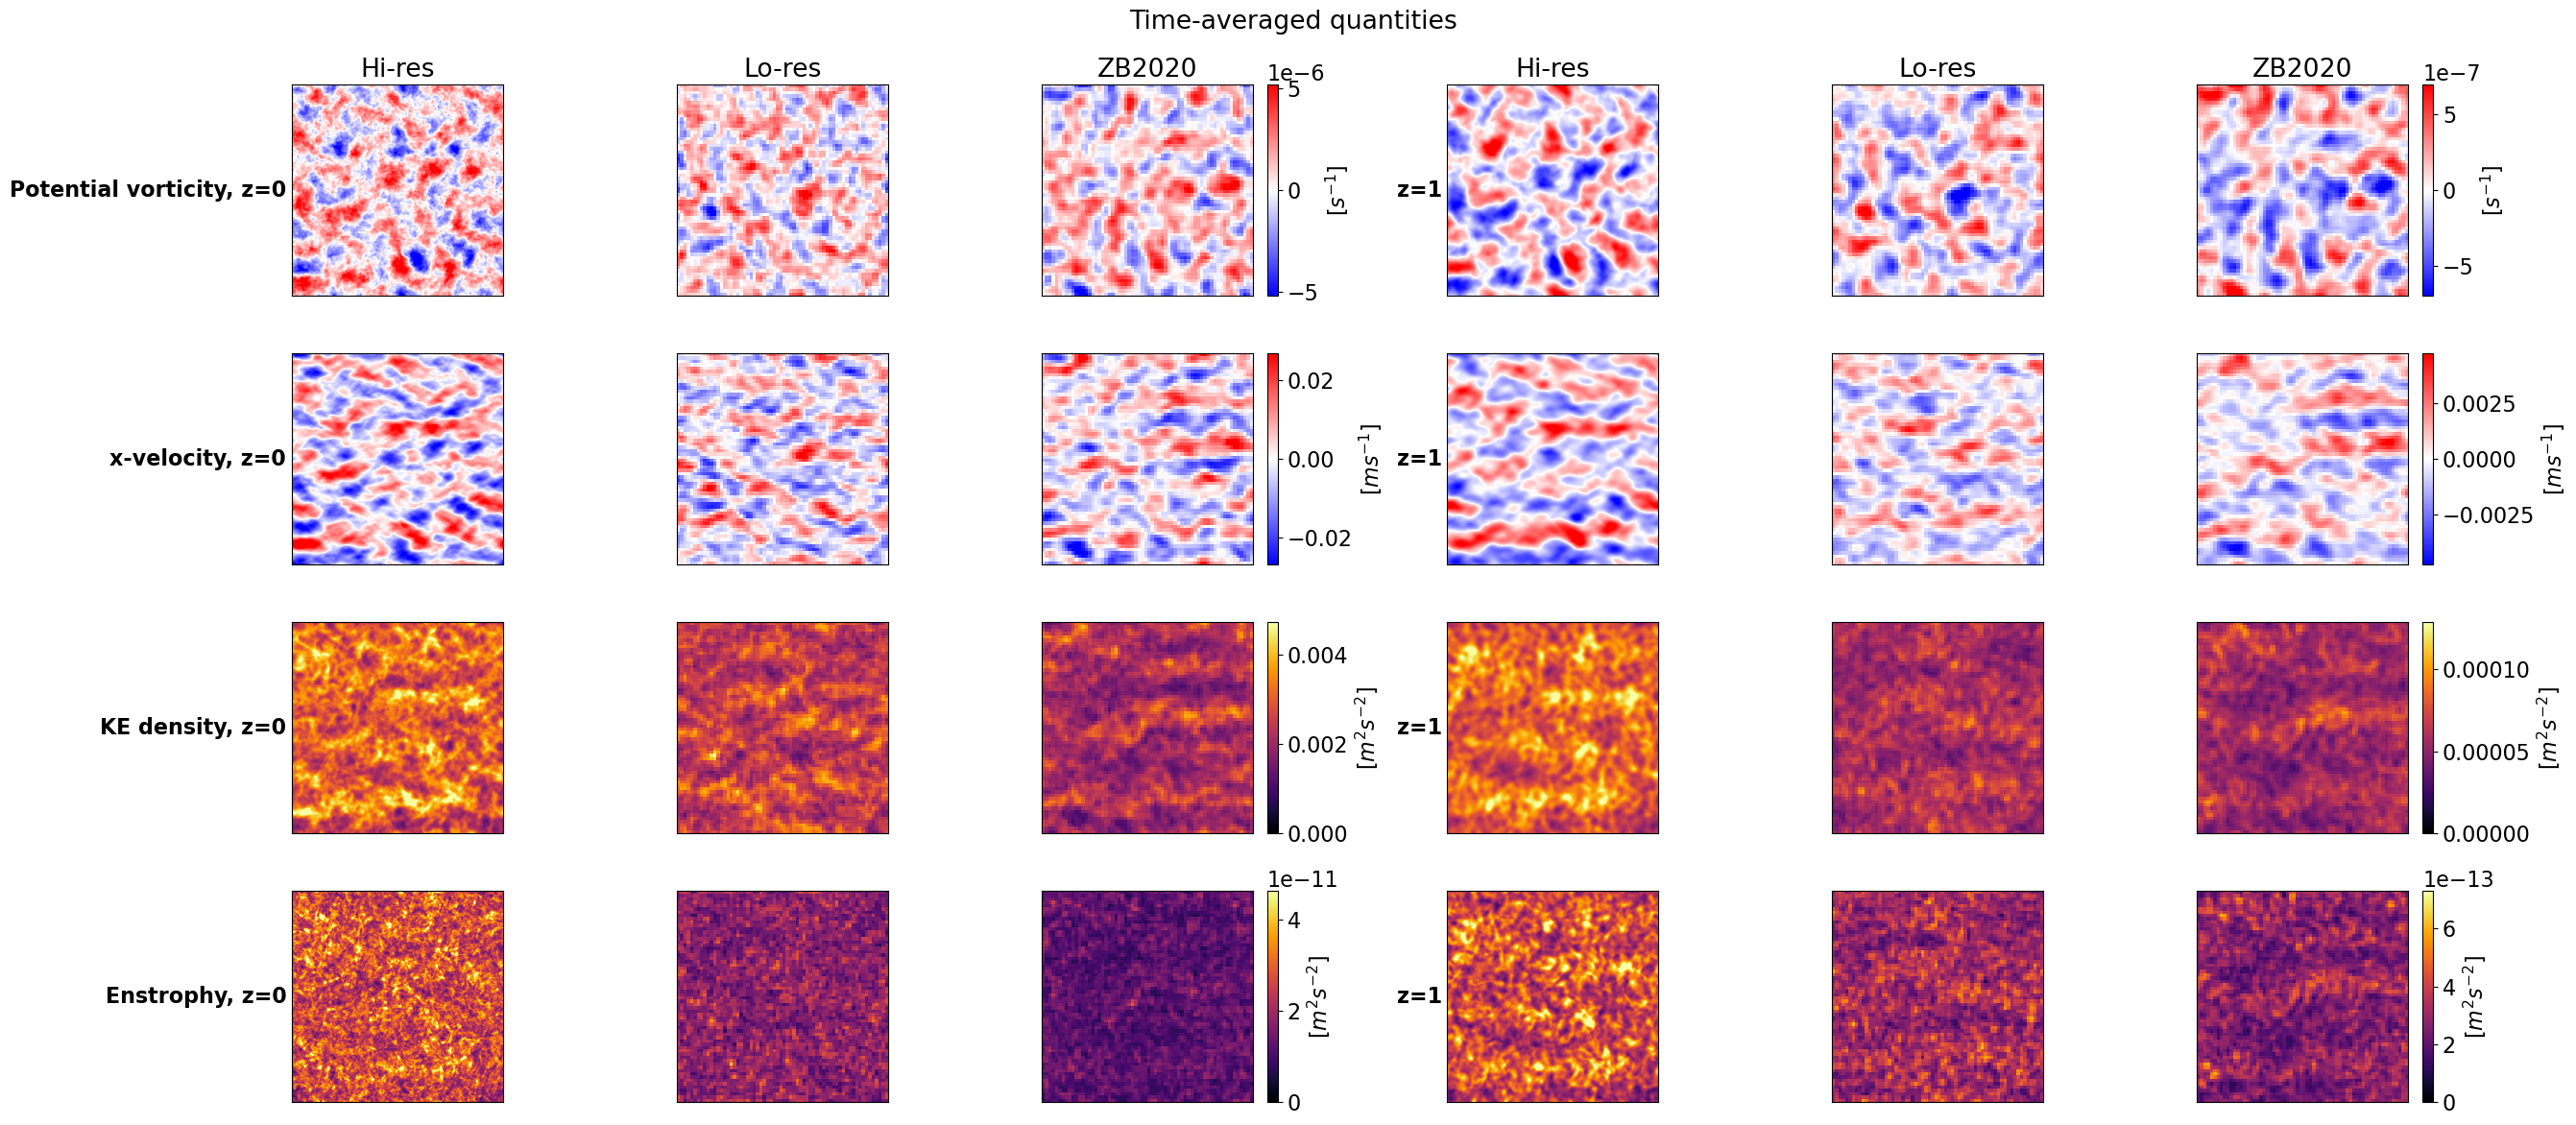

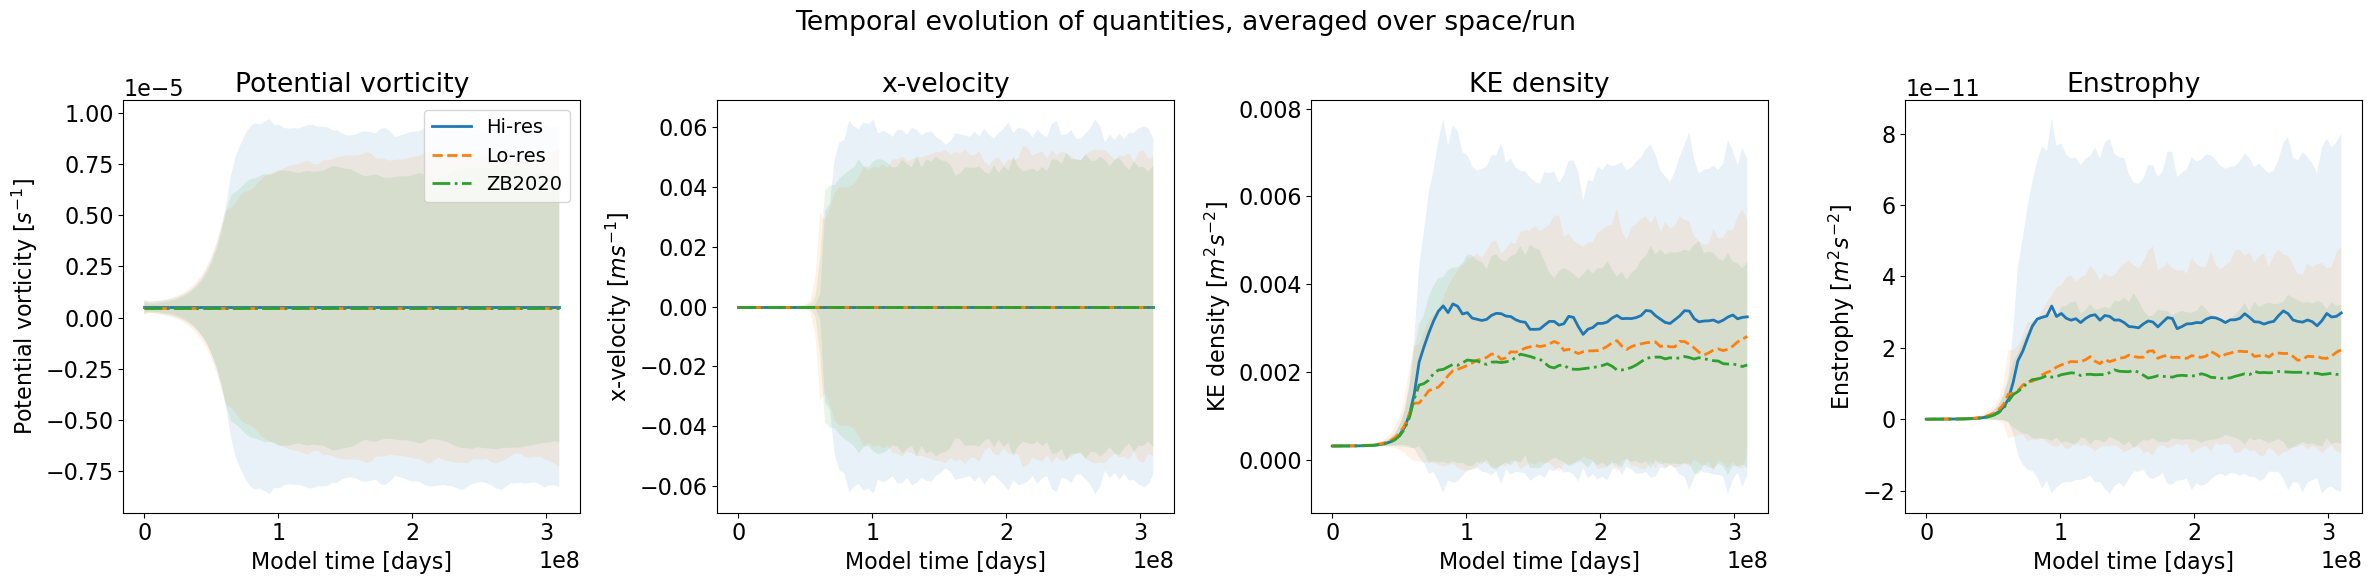

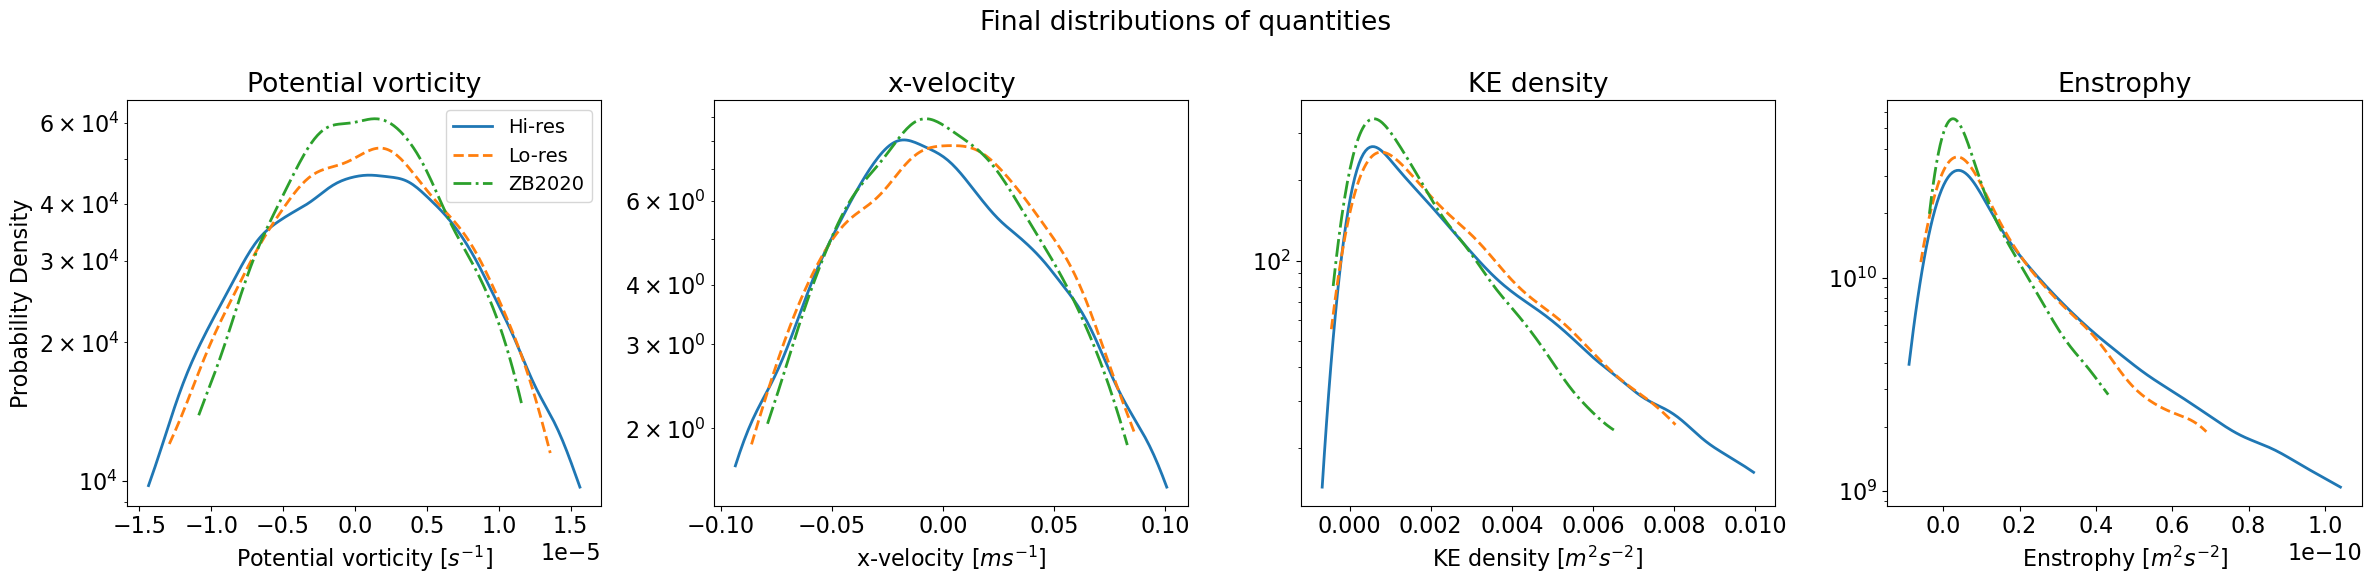

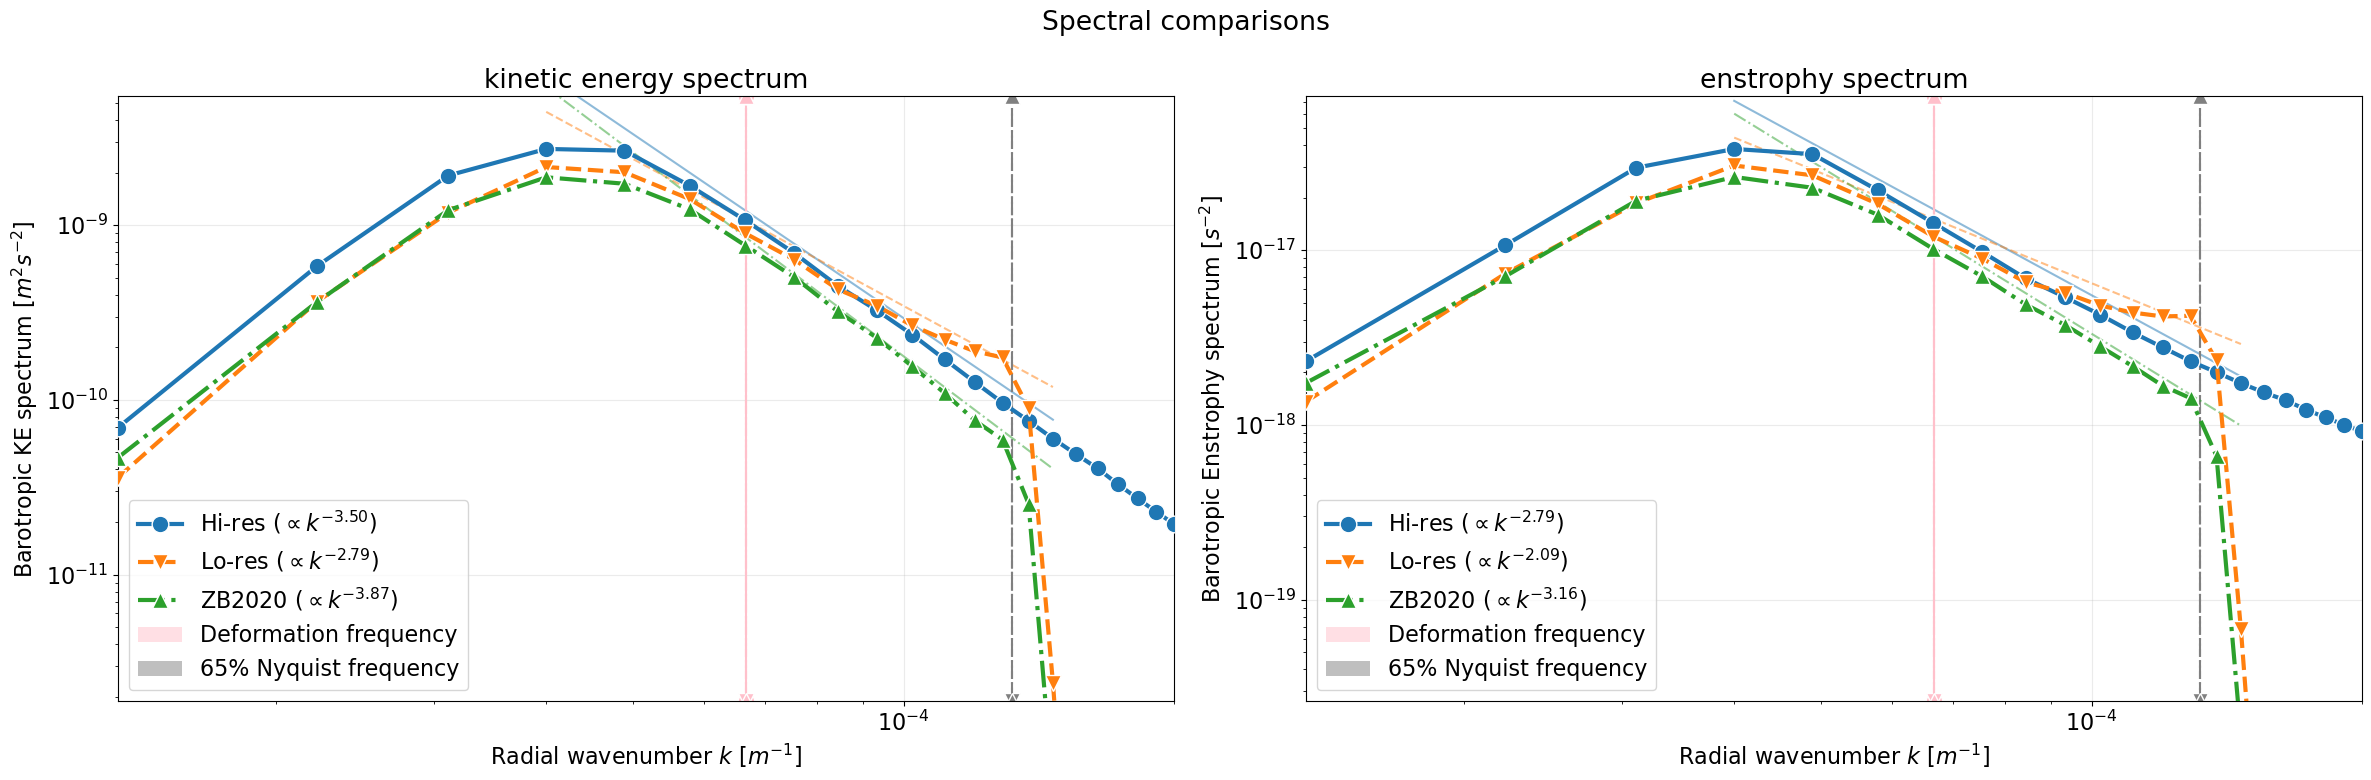

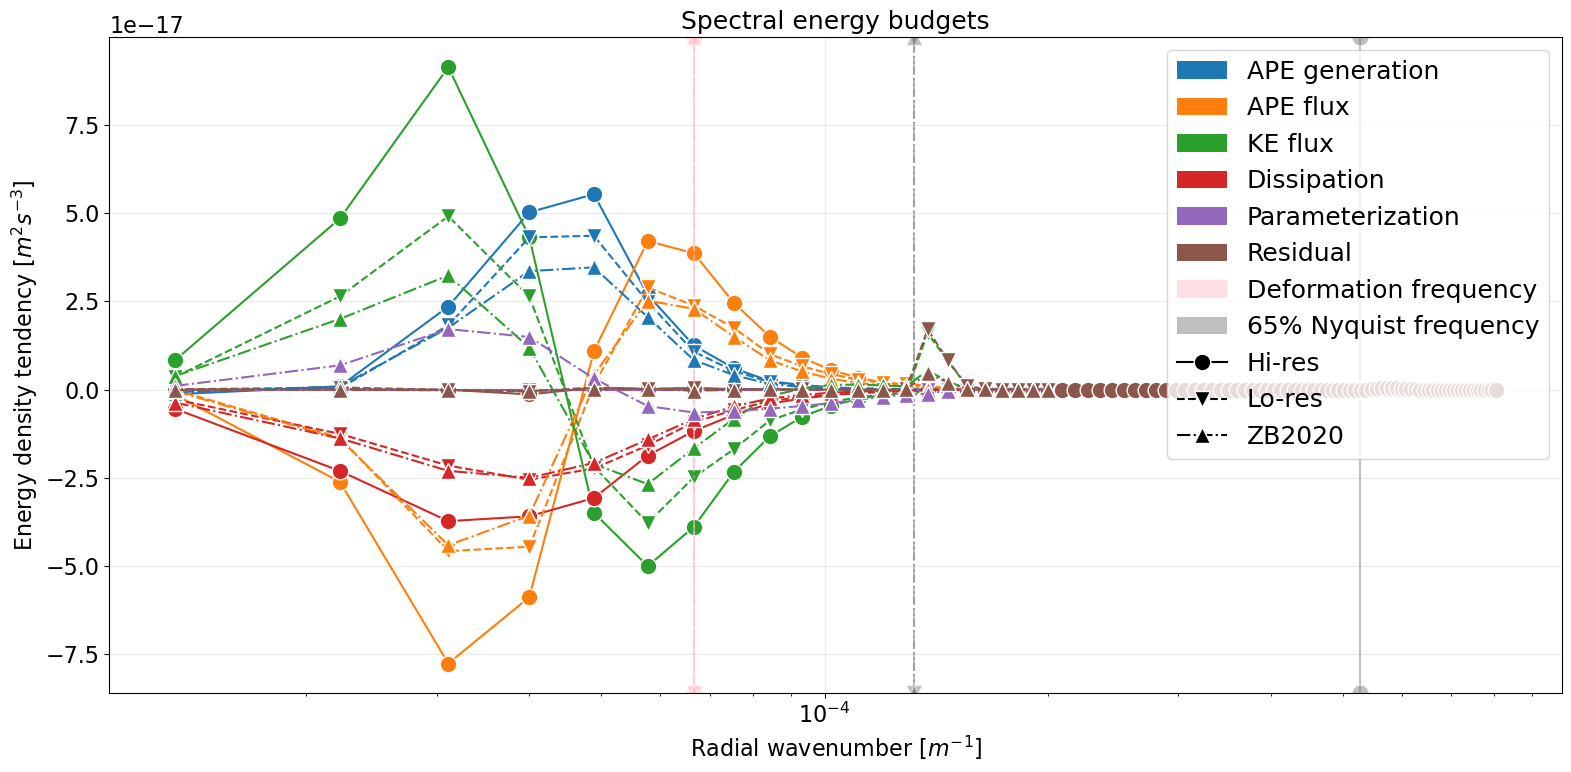

In [40]:
pse.plot_helpers.compare_simulations(
    hires.assign_attrs(label='Hi-res'),
    lores.assign_attrs(label='Lo-res'),
    sims.assign_attrs(label='ZB2020'),
)